# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from google.colab import files
uploaded = files.upload()

Saving insurance2.csv to insurance2 (1).csv


In [3]:
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__  These stats don't seem inappropriate -- being skewed to the right by unusually high (with respect to ALL of the charges) medical charges and has a wide distribution

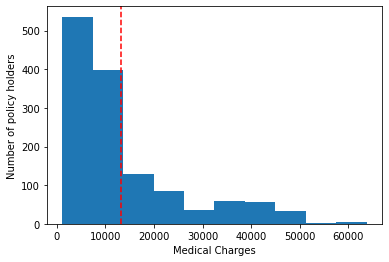

In [6]:
plt.hist(medical.charges)
plt.xlabel('Medical Charges')
plt.ylabel('Number of policy holders')
plt.axvline(np.mean(medical.charges), color='r', linestyle='--')

plt.show()

In [58]:
print("sample mean = " + str(np.mean(medical.charges)))
print("sample standard deviation = " + str(np.std(medical.charges)))

sample mean = 13270.422265141257
sample standard deviation = 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  Assuming that this data is a representative random sample, because we don't have any information (parameters) of the entire population, frequentist statistics would be applicable.  One way would be to simulate a lot of trials with a consistent sample size using the bootstap method.  Another way would be to perform hythesis testing to find statistical significance (i.e, find where our rejection region is) and the likelihood of the mean being less than 12000. 

The most appropriate would be a one-tailed t-test for the mean since we have unknown parameters for our total population.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  Conduct a one-sided hypothesis testing:   
null hypothesis: $\mu$ $\ge$ 12000  
alt hypothesis: $\mu$ $\lt$ 12000  
Below shows that 95% of the time, it is likely that the mean ($\mu$) will be greater than 12725.69. So we do not reject the null hypothesis and the administrator should NOT be concerned that the mean will fall below 12000.

In [8]:
n = len(medical.charges)
std = np.std(medical.charges) #using default ddof=0 for estimation of total population
mean = medical.charges.mean()

tscore = t.ppf(.05, df=n-1) #using alpha=.05 because it's the total area of lower bound
tscore

-1.6459941145571324

In [59]:
standard_error =  std/np.sqrt(n)
tmargerror = tscore * standard_error
conf_int = mean + tmargerror
conf_int

12725.690859802164

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypoth: patients without ins charged the same as patients with ins  
alt hypoth: patients without insurance charged different amount as patients with ins  

We are assuming that the variances are equal and unknown.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [54]:
noins = medical.charges[medical.insuranceclaim == 0]
ins = medical.charges[medical.insuranceclaim == 1]

mean_noins = noins.mean()
std_noins = np.std(noins,ddof=1) #using ddof=1 for because we're comparing SAMPLES, so have to have SAMPLE STD
n_noins = len(noins) 

mean_ins = ins.mean()
std_ins = np.std(ins,ddof=1)
n_ins = len(ins)

print(mean_noins,std_noins,n_noins)
print(mean_ins,std_ins,n_ins)

8821.421892306294 6446.510126811736 555
16423.928276537663 14045.928418802127 783


In [55]:
s_p = np.sqrt((((n_noins - 1)*(std_noins**2)) + ((n_ins - 1)*(std_ins**2)))/(n_noins + n_ins - 2))
tstat = ((mean_noins - mean_ins)/(s_p*(np.sqrt((1/n_noins) + (1/n_ins)))))
tstat

-11.89329903087671

In [61]:
## Compare with the critical t-value
#Degrees of freedom
df = n_ins+n_noins-2

#p-value after comparison with the t-stat
p = 2*t.cdf(tstat, df=df)

print("t-statistic = " + str(tstat))
print("p-value = " + str(p))

t-statistic = -11.89329903087671
p-value = 4.461230231620972e-31


In [53]:
#Verifying using scipy
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(noins, ins)  #our assumption that their variances are equal is default (equal_var=True)
print(t_statistic, p_value)

-11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Use the statsmodels package:

1. to compare two means, assuming they are independent and have the SAME standard deviations, you'd use statsmodels.stats.weightstats.ztest  
2. to compare two means, assuming they are independent and have the DIFFERENT standard deviations, you'd use statsmodels.stats.weightstats.CompareMeans.ztest_ind


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test